In [6]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features,readDict, read_duration,checkForExist
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
Cat = [3,20, 21, 26, 333, 334, 335,40668, 4135, 4534, 469, 46, 50]
amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1120,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB']

In [ ]:
# typ = 3
# for did in NonCat:
#     for amount in amountList:
#         featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
# for did in Cat:
#     for amount in amountList:
#         featureClf(did,cv,round(amount*(readDict(did)['NumberOfFeatures']-1)),typ)
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
for amount in amountList:
    for did in NonCat:
        cv_feature(did,cv,amount)
# amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
# for amount in amountList:
#     for did in Cat:
#         cv_feature(did,cv,amount)

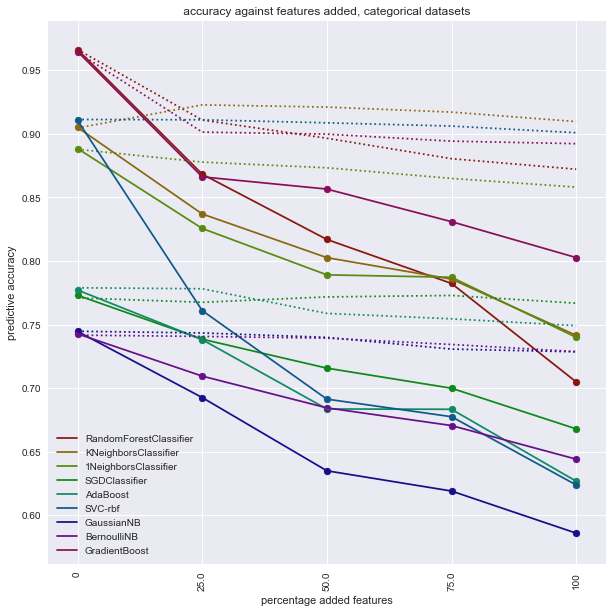

In [10]:

didList = Cat[6:]
didList = [3,20, 21, 26, 333, 334, 335]
scores = []
scores2 = []
amountList = [0.25,0.5,0.75,1]
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) or not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            score2.append(read_features(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
        scores2[i].append(score2)
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    score3.append([0 for i in range(len(amountList)+1)])
MaxClass = []
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
            score3[j][0] = score3[j][0] + (scores2[k][j][i][0])/(len(didList)*len(amountList))
            score3[j][i+1] = score3[j][i+1] + (scores2[k][j][i][1])/len(didList)

for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' accuracy against features added, categorical datasets ' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
    _=ax.plot(x_axis, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()
listCatA = []
listCatA2 = []
for x,i in enumerate(score2):
    listCatA.append(i[0]-i[len(i)-1])
    listCatA2.append(score3[x][0]-score3[x][len(i)-1])
listCatAR = []
listCatAR2 = []
for z,i in enumerate(score2):
    listCatAR.append(0)
    listCatAR2.append(0)
    for x,j in enumerate(i):
        if x > 0:
            listCatAR[z] = listCatAR[z] + (i[x-1]-i[x])/(x_axis[x]-x_axis[x-1])
            listCatAR2[z] = listCatAR2[z] + (score3[z][x-1]-score3[z][x])/(x_axis[x]-x_axis[x-1])
    listCatAR[z] = listCatAR[z]/len(amountList)*x_axis[x]
    listCatAR2[z] = listCatAR2[z]/len(amountList)*x_axis[x]

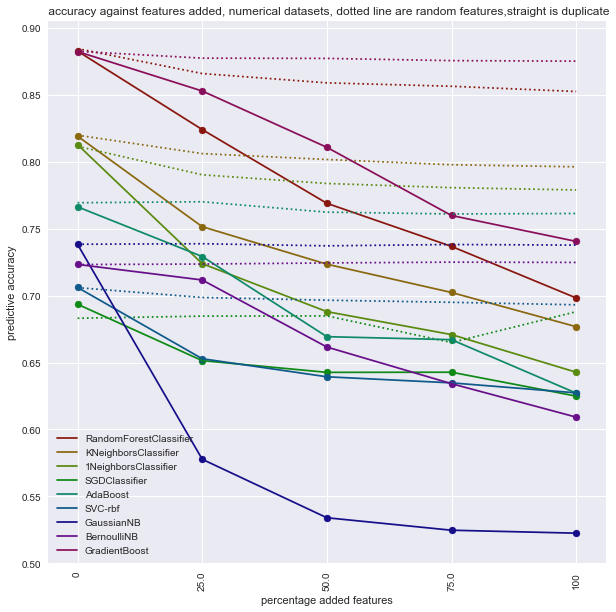

In [6]:
didList = NonCat[:19]
scores = []
scores2 = []
amountList = [0.25,0.5,0.75,1]
func = 'cvScoreFeatures5'
func2 = 'cvScoreFeatures4'
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) or not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            score2.append(read_features(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
        scores2[i].append(score2)
score1 = []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    score3.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
            score3[j][0] = score3[j][0] + (scores2[k][j][i][0])/(len(didList)*len(amountList))
            score3[j][i+1] = score3[j][i+1] + (scores2[k][j][i][1])/len(didList)
for i,x in enumerate(amountList):
    amountList[i] = x*100
amountList2 = copy(amountList)
amountList.insert(0,0)
x_axis = amountList
fig, ax = plt.subplots()
_=plt.title(' accuracy against features added, numerical datasets, dotted line are random features,straight is duplicate' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i],ls = ':')
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
    _=ax.plot(amountList, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()
listNumA = []
listNumA2 = []
for x,i in enumerate(score2):
    listNumA.append(i[0]-i[len(i)-1])
    listNumA2.append(score3[x][0]-score3[x][len(i)-1])
listNumAR = []
listNumAR2 = []
for z,i in enumerate(score2):
    listNumAR.append(0)
    listNumAR2.append(0)
    for x,j in enumerate(i):
        if x > 0:
            listNumAR[z] = listNumAR[z] + (i[x-1]-i[x])/(x_axis[x]-x_axis[x-1])
            listNumAR2[z] = listNumAR2[z] + (score3[z][x-1]-score3[z][x])/(x_axis[x]-x_axis[x-1])
    listNumAR[z] = listNumAR[z]/len(amountList)*x_axis[x]
    listNumAR2[z] = listNumAR2[z]/len(amountList)*x_axis[x]

## Feature addition to numerical and categorical datasets
From the total amount of features a uniformly random selection is made and the selected features are added to the dataset. So for a dataset of 100 features, when there are 25% added features, 25 uniformly random numbers between 0 and 100 are made and the features corresponding to that number in the feature list is added to the dataset, giving a dataset of 125 features.
### Analysis
The randomforestclassifier and gradientBoostingClassifier have the best initial performance, but RandomForestClassifier shows a steep slope.
The impact of the added features to the randomForestClassifier does not seem obvious as there is no change in the data. The impact of the added feature maybe only because the forest is limited by the default hyperparameters in the amount of tree. This means that it takes longer to randomly find the best features and will settle with less important features twice.

The gradientboostingclassifier has a less steep decline than randomforest but this seems only because the default values of randomforest are lower than those of GradientBoostingClassifier. We can compare them considering they are both using trees.

The same may hold for the KNeighborsClassifier but it does not explain the Classifier with only 1 Neighbor, I have not figured out what explains this behaviour.

The GuassianNB has the worst results with the added features.
The BernoulliNB has the least steep decline in performance but it performed only average. The decline can be explained by bad features being impacting the performance. 
Adaboost,SVC-rbf and SGDClassifier show similar results, the ensembles are influenced like the RandomForestClassifier. All three show only average results with the default parameters. SVC-rbf does show a great result on the initail categorical dataset but then falls in line close to the ensembles with 50% added features

### Analysis with random add features
The added numerical features are just a uniformly random distribution between 0 and 1. The categorical features are uniformly random distribution of(0,1,2,3). 
When we compare the performance drops between the amount of added features there is a clear difference, the performance doesn't drop as hard with the random features. This means that the classifiers can better identify these added features as worse than the duplicate features. The Kneighorsclassifiers does have a drop at the beginningf in numerical datasets but it only seems as the addition of the random features and the dependency on all features.  This does not hold for the categorical features where the opposite is true. Where the categorical features added have a positive effect for the prediction accuracy. This can be explained as the categorical features randomness can make the possible neighbors better. After further inspection this only holds for certain datasets, 
For the other classifiers no significant difference can be measured between added random features and the clean dataset. This means that these classifiers: BernoulliNB, GaussianNB, SGDClassifier, AdaBoost and SVC-rbf; can correctly identify the random features as insignificant.

In [12]:
glist = [listCatA,listNumA,listCatA2,listNumA2]
resultsNP = np.array(glist)
df = pd.DataFrame(resultsNP.reshape(len(glist),len(listCatA)),
                  columns=clfNames,index=['categorical datasets','numerical datasets','categorical datasets random features','numerical datasets random features'])
pd.options.display.float_format = '{:.2f}'.format
df


# glist = [listCatA,listNumA]
# resultsNP = np.array(glist)
# gf = pd.DataFrame(resultsNP.reshape(len(glist),len(list3)),
#                   columns=clfNames,index=['categorical datasets','numerical datasets'])
# gf

,RandomForestClassifier,KNeighborsClassifier,1NeighborsClassifier,SGDClassifier,...,SVC-rbf,GaussianNB,BernoulliNB,GradientBoost
categorical datasets,0.26,0.16,0.15,0.11,...,0.29,0.16,0.10,0.16
numerical datasets,0.18,0.14,0.17,0.07,...,0.08,0.22,0.11,0.14
categorical datasets random features,0.09,-0.01,0.03,0.00,...,0.01,0.02,0.01,0.07
numerical datasets random features,0.03,0.02,0.03,-0.00,...,0.01,0.00,-0.00,0.01


In [13]:
glist = [listCatAR,listNumAR,listCatAR2,listNumAR2]
resultsNP = np.array(glist)
df2 = pd.DataFrame(resultsNP.reshape(len(glist),len(listCatAR)),
                  columns=clfNames,index=['cat datasets averaged','num datasets averaged','cat datasets random features averaged','num datasets random features averaged'])
pd.options.display.float_format = '{:.2f}'.format
df2

,RandomForestClassifier,KNeighborsClassifier,1NeighborsClassifier,SGDClassifier,...,SVC-rbf,GaussianNB,BernoulliNB,GradientBoost
cat datasets averaged,0.21,0.13,0.12,0.08,...,0.23,0.13,0.08,0.13
num datasets averaged,0.15,0.11,0.14,0.05,...,0.06,0.17,0.09,0.11
cat datasets random features averaged,0.08,-0.00,0.02,0.00,...,0.01,0.01,0.01,0.06
num datasets random features averaged,0.03,0.02,0.03,-0.00,...,0.01,0.00,-0.00,0.01


### Error slope
calculated from the predictive accuracy difference between measured intances.

For the categorical dataset RandomForestClassifier is clearly not resilient to the duplicated features and either BernoulliNB or SGDClassifier is the most resilient.
For the numerical datasets GaussianNB is the least resilient with again BernoulliNB being the most resilient, but now closely followed by AdaBoost and SVC-rbf. They are still the weakest classifiers with the least predictive accuracy unoptimized. 

The lines however do not seem completely linear so it is depended on the amount of features added. This is 100% added features in this case.

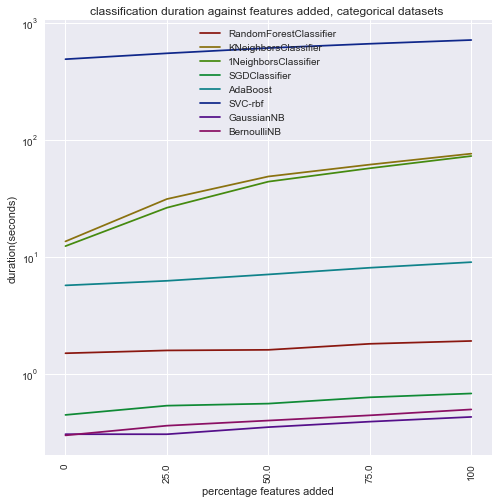

In [11]:
didList = Cat
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvScoreFeatures5'

dur1 = []
dur2 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))) and checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))

cl = sns.hls_palette(len(dur2), l=.3, s=.8)
amountList = [0,0.25,0.5,0.75,1] 
for i,x in enumerate(amountList):
    amountList[i] = x*100
x_axis = amountList
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title('classification duration against features added, categorical datasets ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

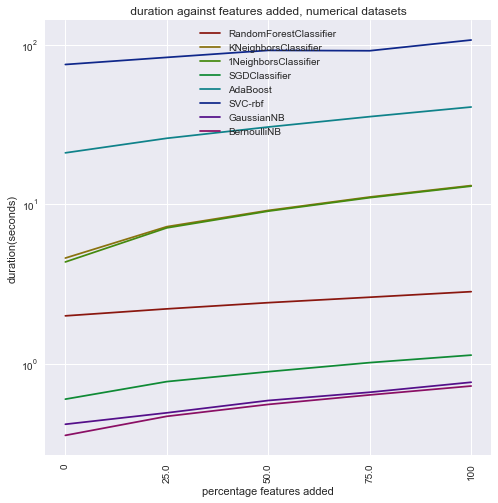

In [3]:
func = 'cvScoreFeatures5'
didList = NonCat
dur1 = []
dur2 = []
typ = 0
fig, ax = plt.subplots()
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur1.append([]) 
    dur2.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 
        dur2[i].append(0)
    dur2[i].append(0)
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
            if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                print(func,clfName,amount,did)
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ]/(len(didList)*len(amountList))
            dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/len(didList)
            dur2[cs][i+1] = dur2[cs][i+1] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+3]/len(didList)
            dur2[cs][0] = dur2[cs][0] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+1]/(len(didList)*len(amountList))

cl = sns.hls_palette(len(dur2), l=.3, s=.8)
amountList = [0,0.25,0.5,0.75,1] 
for i,x in enumerate(amountList):
    amountList[i] = x*100
x_axis = amountList
for i in range(0,len(dur2)):
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' duration against features added, numerical datasets ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

### analysis categorical and numerical classification and prediction duration
On this logscale most classifier do not have a significant change in duration. 
In particular RandomForestClassifier seems nearly unaffacted by the feature addition.
The KneighborsClassifier also show little difference between a single neighbor and the default setting of 5 neighbors with categorical datasets. The difference is a bit more noticable with the categorical datasets
The lines are also a bit more steeper with the categorical datasets.
The steepest curve seems to be from the KNeighborsClassifier which has a steep increase with the 25% added features and then afterwards increases steadily.

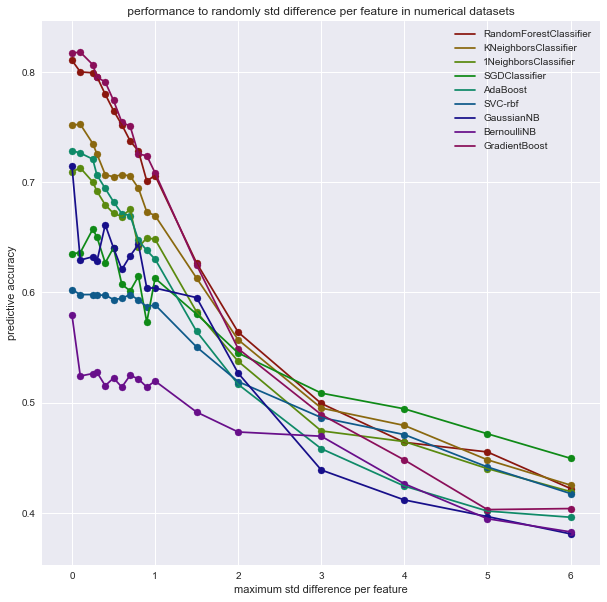

In [10]:
func = 'cvfeatureSTD1'
scores = []
amountList = [0.1,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,6]
didList = [54,53,39,40509]#NonCat#[12,14,16,18,22,28,30,32,36,37]
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList)+1)])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][0] = score2[j][0] + (scores[k][j][i][0])/(len(didList)*len(amountList))
            score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
amountList2 = [0]
for i in amountList:
    amountList2.append(i)
x_axis = amountList2
fig, ax = plt.subplots()
_=plt.title(' performance to randomly std difference per feature in numerical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(amountList,approx[i],ls = ':',color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()
listNum = []
for x,i in enumerate(score2):
    listNum.append(i[0]-i[len(i)-1])
listNumR = []
for z,i in enumerate(score2):
    listNumR.append(0)
    for x,j in enumerate(i):
        if x > 0:
            listNumR[z] = listNumR[z] + (i[x-1]-i[x])/(x_axis[x]-x_axis[x-1])
    listNumR[z] = listNumR[z]/len(amountList)*x_axis[x]

## std difference per feature
for each feature the standard deviation(std) is calculated and there is a 50% change to add and a 50% to decrease the feature by a value. This value is uniformly picked between 0 and the maximum std difference for the specific feature. In short(+/- random*amount*std)

### Analysis 
Here similair results are observed as with increased features but the drops are mostly greater, Except for GaussianNB.
Here RandomForestClassifier drops significantly as seems obvious as the features can fall outside the pre calculated estimators. 
The KneighborClassifier have a slow descent which can be explained as the featuers slowly getting out of range of their 'neighbor' features. The 1 neighbor and 5 neighbors have similair results and the single neighbor classifier is greater impacted by the std difference. 
The drop of performance of Gaussian can be attributed to the features getting out of range of the calculated variance 
The sudden drop in performance of Bernoulli is of the boolean convertion of features which seems to highly impact it. 
Both ensembles(SGD and Adaboost) have a smilair slope to the KNeighborsClassifier. This can be explained by mediocre initial results accuracy and with the combining of models the difference can be less impactful.

### General analysis
The performance of the algorithms not converting to random guessing can be explained by the datasets for example not having a normal distribution. Medical datasets can have a large variance falling outside of the range of 6 standard deviations

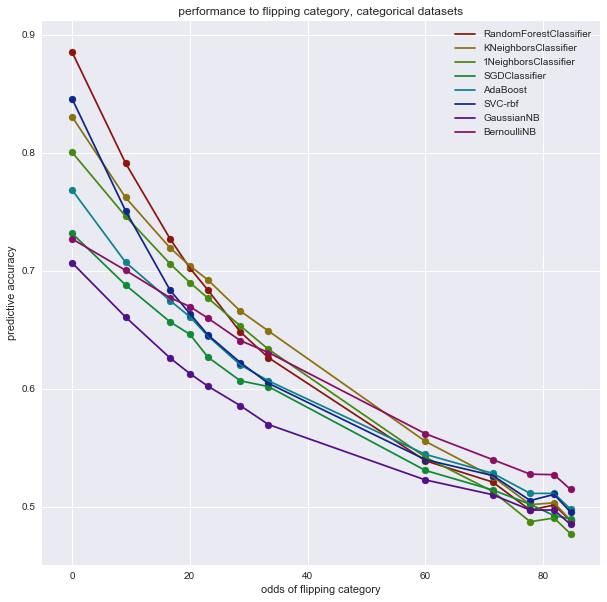

In [13]:
func = 'cvfeatureCAT2'
scores = []
amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
didList = [3,20, 21, 26, 333, 334, 335, 40668, 4135, 4534, 469, 46, 50]
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
flipped = []
for i in amountList:
    if i > 0.5:
        flipped.append((1-1/(i+0.5))*100)
    else:
        flipped.append(0)
x_axis = flipped
fig, ax = plt.subplots()
_=plt.title(' performance to flipping category, categorical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('odds of flipping category')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.legend()
plt.show()
listCat = []
for x,i in enumerate(score2):
    listCat.append(i[0]-i[len(i)-1])
listCatR = []
for z,i in enumerate(score2):
    listCatR.append(0)
    for x,j in enumerate(i):
        if x > 0:
            listCatR[z] = listCatR[z] + (i[x-1]-i[x])/(x_axis[x]-x_axis[x-1])
    listCatR[z] = listCatR[z]/len(amountList)*x_axis[x]

## flipping categories
a balance is made of the occurence of categories per feature. For each feature a uniformly random number is chosen between 0 and 100 and when the number is lower than the 'odds of flipping', the feature is overwritten by a randomly chosen category from the category distribution calculated at the start. 

### Analysis of categorical dataset
Here again the randomForestClassifier falls the hardest. Which can be explained by the overwritten features now having no relation with the previous feature value. This means that previous important features can be irrelevant.
The KNeighborsClassifier get a smaller impact as they are more dependent on multiple features and will drop down more gradually.
SVC-rbf has better starting results than with numerical datasets but also falls harder with the changes, as can be contritubed to the dependency on all features at the same time with weights.(not like k neighbor classifier which spread the outcome uniformly over all features by default.)
BernoulliNB shows promosing results with a less steep decling and greatest performance on the worst set(more than 60% flipped categories).

#### General analysis
near the 80% mark a small increase can be noticed with every classifier this can be explained by the sheer randomness of the features at that point,
The results  combining together around 0.5, can be explained by the Majority class guessing giving around 0.44 accuracy, which is likely considering the dataset is already 80% noise.

In [12]:
glist = [listCat,listCatR,listNum,listNumR]
resultsNP = np.array(glist)
df = pd.DataFrame(resultsNP.reshape(len(glist),len(listCat)),
                  columns=clfNames,index=['categorical datasets','categorical datasets averaged','numerical datasets','numerical datasets averaged'])
df

,RandomForestClassifier,KNeighborsClassifier,1NeighborsClassifier,SGDClassifier,AdaBoost,SVC-rbf,GaussianNB,BernoulliNB
categorical datasets,0.40,0.34,0.32,0.24,0.27,0.35,0.22,0.21
categorical datasets averaged,0.39,0.32,0.30,0.23,0.27,0.35,0.23,0.20
numerical datasets,0.46,0.33,0.34,0.27,0.26,0.19,0.37,0.31
numerical datasets averaged,0.71,0.42,0.46,0.36,0.39,0.28,0.45,0.33


### Error slope analysis
Above the error slope can be observed for the studied classifiers, now you can clearly see that RandomForestClassifier has the steepest decline in quality.
The flipping categories can also be observed to have a larger impact for the randomForestClassifier, which seems obvious considering you cannot distinguish the feature anymore and with the numerical datasets the feature can still be distinguishable close.
It must also be noted that these slopes are only considering the current range of studied cases and are not scaled to the addition or flipping. (Numerical dataset addition of std to a maximum of 6* std and for categorical features till 80% flipped.
When we compare the averaged with the total we can also observe the larger impact on numerical datasets compared to categorical datasets. For the categorical datasets there is a gradual decline which explains that the averaged is close to the overall.
For numerical datasets the decline is steeper at the beginning and becomes gradual afterwards.

In [8]:
amountList = [1.5]
didList = NonCat
func = 'cvfeatureSTD1'
for i,did in enumerate(didList):
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            if not checkForExist(func,clfName,did,amount):
                print(func,clfName,amount,did)

In [25]:
np.polyfit(x_axis, np.log(score2[0]), 1)

array([-0.133, -0.253])

In [26]:
def funcs(ab,x):
    return ab[0]* np.log(x) + ab[1]

In [78]:
approx = []
for j,x in enumerate(clfNames):
    approx.append([])
    for i in amountList:
        approx[j].append(1+funcs(np.polyfit(x_axis, np.log(score2[j]), 1),i))

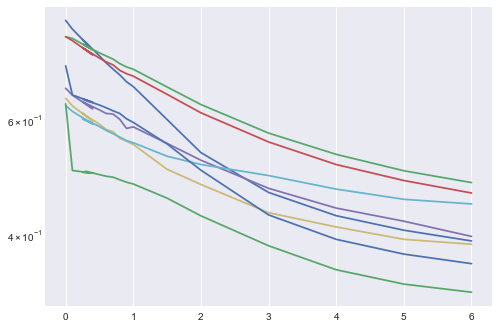

In [83]:
fig, ax = plt.subplots()
for i,x in enumerate(score2):
    plt.plot(x_axis,x)
ax.set_yscale("log", nonposy='clip')
plt.show()